# Polynomial Regression Model


### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
%matplotlib inline

def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,10,ndata)
    Ytrain = np.sin(Xtrain) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain
Xtrain,Ytrain = generatedata(50,seed=1)



### Part 1, Visualize the data

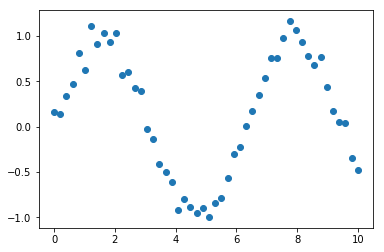

In [2]:
plt.scatter(Xtrain, Ytrain)

### Part 2, design matrix polynomial regression: Please finish this section
We would like to create the polynomial design matrix up to order k. 

**Input: **

- input vector: $x = (X_{1},X_{2},\cdots,X_{n})$

- model order k: 

**Output: **
- Model matrix:
$ \left[\begin{array}{cccc}
X_{1}^{1} & X_{1}^{2} & \cdots & X_{1}^{p}\\
X_{2}^{1} & X_{2}^{2} & \cdots & X_{2}^{p}\\
\vdots\\
X_{n}^{1} & X_{n}^{2} & \cdots & X_{n}^{p}
\end{array}\right]$

In [3]:
def polynomialfeatures(x,k):
    X=np.zeros((len(x),k))
    for i in range (1,len(x)+1):
        for j in range(1,k+1):
            X[i-1,j-1]= x[i-1]**j
    return X


#### Let's validate the result
Does your result seem correct?

In [4]:
x = np.array([1,2,3])
polynomialfeatures(x,3)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [5]:
print("Yes, the result is correct.")

Yes, the result is correct.


### Part 3: Training and Testing Split , please finish this section
For this section, we would like to fit a linear regression model to the generated data with polynomial with the order $p$ from $1$ to $20$. We need to first to generate a set of testing data set to evaluate the algorithm, as in xtest, ytest. We would like to use the residual sum of square error to evaluate the performance of the algorithm

In [6]:
## RSS value for 1 to 20 degree of polynomials

from sklearn.linear_model import LinearRegression

ntest = 1000
xtest,ytest = generatedata(ntest,seed=2)
SSE = np.zeros((20))
# We can define the 0 order polynomial as the mean prediction
SSE[0] = np.sum((ytest-np.mean(Ytrain))**2)
error = []

for p in range(1,21):
    model=LinearRegression()
    X_ = polynomialfeatures(Xtrain,p)
    model1 = model.fit(X_, Ytrain)
    n_xtest = polynomialfeatures(xtest,p)
    error_sk=np.sum((ytest - model.predict(n_xtest))**2)
    error.append(error_sk)
    print ("Residual Sum of square of Error  at degree %s is %s" %(p, error_sk))
  
    

Residual Sum of square of Error  at degree 1 is 453.3510177410034
Residual Sum of square of Error  at degree 2 is 371.8201239810463
Residual Sum of square of Error  at degree 3 is 344.24557565387533
Residual Sum of square of Error  at degree 4 is 52.254569857010495
Residual Sum of square of Error  at degree 5 is 41.74718094891625
Residual Sum of square of Error  at degree 6 is 11.40719514922656
Residual Sum of square of Error  at degree 7 is 11.232819941585316
Residual Sum of square of Error  at degree 8 is 11.085113014840788
Residual Sum of square of Error  at degree 9 is 11.532830173418745
Residual Sum of square of Error  at degree 10 is 11.71004558118057
Residual Sum of square of Error  at degree 11 is 11.699882309489071
Residual Sum of square of Error  at degree 12 is 11.810953705119235
Residual Sum of square of Error  at degree 13 is 11.814941980492428
Residual Sum of square of Error  at degree 14 is 11.7854867446842
Residual Sum of square of Error  at degree 15 is 11.471079098174

#### Visualize the Testing accuracy

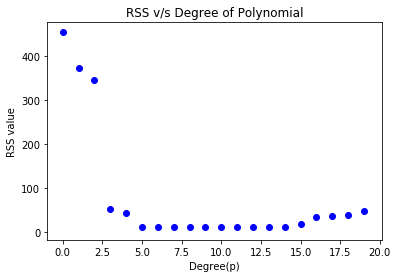

In [7]:
for p in range(20):
    plt.scatter(p,error[p],color="blue")
    plt.xlabel("Degree(p)")
    plt.ylabel("RSS value")
    plt.title("RSS v/s Degree of Polynomial")

### The value with the least RSS value is coming to be at degree 8 with a value of 11.08511

### Part 4: Bonus
(Bonus and open question): for this question, since we are simulating the example and we do know the true function. Can you use simulation to compute the bias and variance for different order of polynomial function? If so, please use simulation to estimate the bias and variance for polynomial model from order 1 to 20 and comment on the result. 

In [8]:
n_sims = 100 #Conduct 100 simulation runs
n_models = 20 #20 models to be compared with each other
x0 = np.array([5]) #Arbitirarily choose x0=5
predictions = np.zeros((n_sims,n_models)) #Created initial array to store predicted values

for i in range(n_sims):
    Xtrain,Ytrain = generatedata(100,seed=i)
    predictions[i,0] = np.mean(Ytrain)
    for p in range(1,20):
        regr = LinearRegression()
        regr.fit(polynomialfeatures(Xtrain,p),Ytrain)
        predictions[i,p] = regr.predict(polynomialfeatures(x0,p))
        
def get_squared_bias(estimate,truth):
    return (np.mean(estimate)-truth)**2 #Define Bias Function

def get_mse(estimate,truth):
    return np.mean((estimate-truth)**2) #Define MSE Function

variance =np.var(predictions, axis=0)
squared_bias = np.zeros((20))
mse = np.zeros((20))

for i in range(20):
    squared_bias[i] = get_squared_bias(predictions[:,i],ftrue(10))
    mse[i] = get_mse(predictions[:,i],ftrue(10))
    
print(np.argmin(variance))
print(np.argmin(squared_bias))
print(np.argmin(mse)) 
plt.plot(variance)
plt.title('Variance' )
plt.figure()
plt.plot(squared_bias)
plt.title('Bias')
plt.figure()
plt.plot(squared_bias)
plt.title('MSE')


0
4
4


## At degree 1 we are getting the least value of the bias and variance.

### Part 5: Visualization of your final model
Please plot the final model that you would like to use for this problem.

In [69]:
#We choose the model with the smallest SSE

order = np.argmin(SSE)
print("The polynomial order we choose is", order ,"due to the smallest SSE")

# The model coefficients are
regr.fit(polynomialfeatures(Xtrain,order),Ytrain)
print("The model intercept is",regr.intercept_, "and coefficients are",regr.coef_)

The polynomial order we choose is 1 due to the smallest SSE
The model intercept is 0.266612638561 and coefficients are [-0.01628748]


Text(0,0.5,'y')

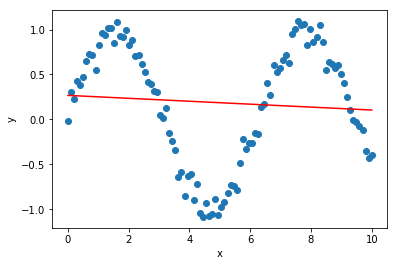

In [70]:
# Generate regression fitted plot

yhat = regr.predict(polynomialfeatures(Xtrain,order))
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain,yhat,'red')
plt.xlabel('x')
plt.ylabel('y')
